## 4.1	数据清洗

### 4.1.1	缺失值的检测

In [2]:
import pandas as pd
import numpy as np
df_na = pd.DataFrame({'Num1':[1, 2, None, 4],
                      'Num2':[5, 6, 7, 8],
                      'Num3':[9, 10, 11, 12],
                      'Num4':[13, 14, np.NaN, np.NaN]})
df_na

,Num1,Num2,Num3,Num4
0,1.0,5,9,13.0
1,2.0,6,10,14.0
2,NaN,7,11,NaN
3,4.0,8,12,NaN


In [3]:
pd.isnull(df_na)      # 检测数据中是否包含缺失值

,Num1,Num2,Num3,Num4
0,False,False,False,False
1,False,False,False,False
2,True,False,False,True
3,False,False,False,True


In [4]:
pd.notnull(df_na)      # 检测数据中是否不包含缺失值

,Num1,Num2,Num3,Num4
0,True,True,True,True
1,True,True,True,True
2,False,True,True,False
3,True,True,True,False


In [5]:
def missing_values_table(df):
    # 计算每列包含缺失值的数量
    mis_val = df.isnull().sum()
    # 计算所有列缺失值⽐例
    mis_val_percent = df.isnull().sum() / len(df) * 100
    # 将数量和比例组合成DataFrame类的对象
    mis_val_table = pd.DataFrame({'数量':mis_val, '占比(%)':mis_val_percent})
    # 按照缺失值的数量降序排列
    mis_val_table_sorted = mis_val_table.sort_values('数量', ascending=False)
    return mis_val_table_sorted

In [6]:
missing_values_table(df_na)   # 统计缺失值的数量和占比情况

,数量,占比(%)
Num4,2,50.0
Num1,1,25.0
Num2,0,0.0
Num3,0,0.0


### 4.1.2	缺失值的处理

In [7]:
df_na.dropna()      # 删除包含缺失值的行

,Num1,Num2,Num3,Num4
0,1.0,5,9,13.0
1,2.0,6,10,14.0


In [8]:
df_na.dropna(thresh=3)      # 删除包含缺失值的行，并指定非缺失值的数量

,Num1,Num2,Num3,Num4
0,1.0,5,9,13.0
1,2.0,6,10,14.0
3,4.0,8,12,NaN


In [9]:
import pandas as pd
import numpy as np
df_na = pd.DataFrame({'Num1':[1, 2, None, 4],
                      'Num2':[5, 6, 7, 8],
                      'Num3':[9, 10, 11, 12],
                      'Num4':[13, 14, np.NaN, np.NaN]})
df_na

,Num1,Num2,Num3,Num4
0,1.0,5,9,13.0
1,2.0,6,10,14.0
2,NaN,7,11,NaN
3,4.0,8,12,NaN


In [10]:
df_na.fillna(value=66.0)   # 使用标量66.0填充缺失值

,Num1,Num2,Num3,Num4
0,1.0,5,9,13.0
1,2.0,6,10,14.0
2,66.0,7,11,66.0
3,4.0,8,12,66.0


In [11]:
# 计算Num1列的平均数，并保留一位小数
mean_num1 = round(df_na['Num1'].mean(), 1)
mean_num1

2.3

In [12]:
# 计算Num4列的平均数，并保留一位小数
mean_num4 = round(df_na['Num4'].mean(), 1)
mean_num4

13.5

In [13]:
df_na.fillna(value={'Num1':mean_num1, 'Num4':mean_num4})

,Num1,Num2,Num3,Num4
0,1.0,5,9,13.0
1,2.0,6,10,14.0
2,2.3,7,11,13.5
3,4.0,8,12,13.5


In [14]:
df_na.fillna(method='ffill')         # 采用前向填充的方式填充缺失值

,Num1,Num2,Num3,Num4
0,1.0,5,9,13.0
1,2.0,6,10,14.0
2,2.0,7,11,14.0
3,4.0,8,12,14.0


In [15]:
df_na.fillna(method='bfill')  # 采用后向填充的方式填充缺失值

,Num1,Num2,Num3,Num4
0,1.0,5,9,13.0
1,2.0,6,10,14.0
2,4.0,7,11,NaN
3,4.0,8,12,NaN


### 4.1.3	重复值的检测

In [16]:
import pandas as pd
person_info = pd.DataFrame({'name':['张三', '李四', '王五', '赵六', '赵六', '孙七'], 
                            'age': [24, 23, 29, 22, 22, 27], 'height': [162, 165, 175, 175, 175, 180], 'gender': ['女', '女', '男', '男', '男', '男']})
person_info

,name,age,height,gender
0,张三,24,162,女
1,李四,23,165,女
2,王五,29,175,男
3,赵六,22,175,男
4,赵六,22,175,男
5,孙七,27,180,男


In [17]:
# 检测重复值，保留第一次出现的行，标记再次出现的其他行为重复值
person_info.duplicated()       

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

### 4.1.4	重复值的处理

In [18]:
person_info.drop_duplicates()   # 删除重复值

,name,age,height,gender
0,张三,24,162,女
1,李四,23,165,女
2,王五,29,175,男
3,赵六,22,175,男
5,孙七,27,180,男


### 4.1.5	异常值的检测

#### 1．通过3σ原则检测异常值

In [19]:
import numpy as np
import pandas as pd
def three_sigma(ser):
    """
    :param ser: 被检测的数据，接收DataFrame类的对象的一列数据
    :return: 异常值及其对应的行索引
    """
    # 计算平均值
    mean_data = ser.mean()
    # 计算标准差
    std_data = ser.std()
    #小于μ-3σ或大于μ+3σ的数值均为异常值
    rule = (mean_data-3*std_data>ser) | (mean_data+3*std_data<ser)
    # 返回异常值的行索引
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值
    outliers = ser.iloc[index]
    return outliers

In [24]:
import pandas as pd
df_obj = pd.read_csv(r'outlier_data.csv')
df_obj

,A,B
0,1,2
1,2,3
2,3,8
3,4,5
4,5,6
5,6,7
6,30,8
7,3,9
8,3,0
9,4,3


In [25]:
three_sigma (df_obj['A'])

6    30
Name: A, dtype: int64

In [26]:
three_sigma(df_obj['B'])

Series([], Name: B, dtype: int64)

#### 2．通过箱形图检测异常值

<AxesSubplot:>

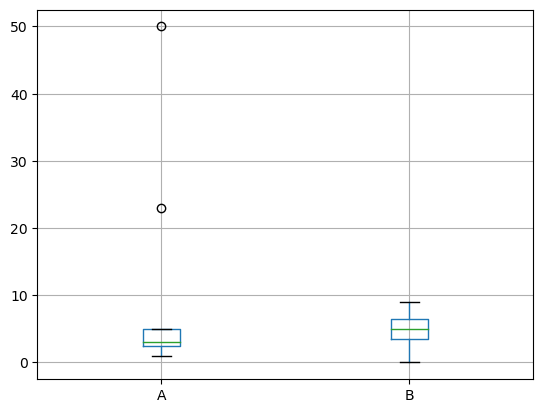

In [29]:
df_obj = pd.read_csv(r'example_data.csv')
df_obj.boxplot(column=['A', 'B'])   # 绘制箱形图

In [34]:
import numpy as np
def box_outliers(ser):
    # 对待检测的数据集进行排序
    new_ser = ser.sort_values()
    # 判断数据的总数量是奇数还是偶数
    if new_ser.count() % 2 == 0:
        # 计算Q3、Q1、IQR
        Q3 = new_ser[int(len(new_ser) / 2):].median()
        Q1 = new_ser[:int(len(new_ser) / 2)].median()
    elif new_ser.count() % 2 != 0:
        Q3 = new_ser[int((len(new_ser)-1) / 2):].median()
        Q1 = new_ser[:int((len(new_ser)-1) / 2)].median()
    IQR = round(Q3 - Q1, 1)
    rule = (round(Q3+1.5*IQR, 1) < ser)|(round(Q1-1.5*IQR, 1) > ser)
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值及其索引
    outliers = ser.iloc[index]
    return outliers

In [35]:
box_outliers(df_obj['A'])

5     50
15    23
Name: A, dtype: int64

### 4.1.6	异常值的处理

In [41]:
df_obj.replace(to_replace=23, value=3)   # 替换一个异常值

,A,B
0,1,2
1,2,3
2,3,8
3,4,5
4,5,6
5,50,7
6,2,8
7,3,9
8,3,0
9,4,3


In [43]:
df_obj.replace(to_replace=[23, 50], value=[3, 2])   # 替换多个异常值

,A,B
0,1,2
1,2,3
2,3,8
3,4,5
4,5,6
5,2,7
6,2,8
7,3,9
8,3,0
9,4,3


### 4.1.7	更改数据类型

In [44]:
import pandas as pd
df = pd.DataFrame({'A': ['1', '1.2', '4.2'],
                       'B': ['-9', '70', '88'],
                        'C': ['x', '5.0', '0']})
df.dtypes

A    object
B    object
C    object
dtype: object

In [45]:
df['B'].astype(dtype='int')  # 强制转换为int类型

0    -9
1    70
2    88
Name: B, dtype: int32

In [67]:
import pandas as pd
ser_obj = pd.Series(['1.5', '2.2', '3.8'])
ser_obj

0    1.5
1    2.2
2    3.8
dtype: object

In [68]:
# 将object类型转换为float类型
pd.to_numeric(ser_obj)

0    1.5
1    2.2
2    3.8
dtype: float64

In [69]:
# 重新将末尾的数值改成字符串
ser_obj[2] = 'problem'
# 再次将object类型转换为float类型
pd.to_numeric(ser_obj)

ValueError: Unable to parse string "problem" at position 2

In [70]:
# 忽略非数字的值
pd.to_numeric(ser_obj, errors='ignore')

0        1.5
1        2.2
2    problem
dtype: object

In [71]:
# 将非数字的值设置成NaN
pd.to_numeric(ser_obj, errors ='coerce')

0    1.5
1    2.2
2    NaN
dtype: float64

## 4.2	数据合并

### 4.2.1	堆叠合并

In [72]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                        'B': ['B0', 'B1', 'B2'],
                        'C': ['C0', 'C1', 'C2']})
df2 = pd.DataFrame({'C': ['C3', 'C4', 'C5', 'C6'],
                        'D': ['D0', 'D1', 'D2', 'D3']})
# 采用横向堆叠、外连接的方式合并df1和df2
result = pd.concat([df1, df2], join='outer', axis=1)
result

,A,B,C,C,D
0,A0,B0,C0,C3,D0
1,A1,B1,C1,C4,D1
2,A2,B2,C2,C5,D2
3,NaN,NaN,NaN,C6,D3


In [73]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2'],
                    'C': ['C0', 'C1', 'C2']})
df2 = pd.DataFrame({'C': ['C3', 'C4', 'C5', 'C6'],
                    'D': ['D0', 'D1', 'D2', 'D3']})
# 采用纵向堆叠、内连接的方式合并df1和df2
result = pd.concat([df1, df2], join='inner', axis=0)
result

,C
0,C0
1,C1
2,C2
0,C3
1,C4
2,C5
3,C6


### 4.2.2	主键合并

In [74]:
import pandas as pd
left = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2']})
right = pd.DataFrame({'key': ['K0', 'K2', 'K3', 'K5'], 
'A': ['A0', 'A1', 'A2', 'A3'], 'C': ['C0', 'C1', 'C2', 'C3']})
# 根据key列，采用内连接的方式合并left和right
result = pd.merge(left=left, right=right, on='key')
result

,key,A_x,B,A_y,C
0,K0,A0,B0,A0,C0
1,K2,A2,B2,A1,C1


In [75]:
# 根据key列和A列，采用内连接的方式合并left和right
result = pd.merge(left=left, right=right, on=['key', 'A'])
result

,key,A,B,C
0,K0,A0,B0,C0


In [76]:
import pandas as pd
left = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'A': ['A0', 'A1', 'A2'],'B': ['B0', 'B1', 'B2']})
right = pd.DataFrame({'key': ['K0', 'K2', 'K3', 'K5'], 'A': ['A0', 'A1', 'A2', 'A3'], 'C': ['C0', 'C1', 'C2', 'C3']})
# 根据key列，采用全外连接的方式合并left和right
result = pd.merge(left=left, right=right, on='key', how='outer')
result

,key,A_x,B,A_y,C
0,K0,A0,B0,A0,C0
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,A1,C1
3,K3,NaN,NaN,A2,C2
4,K5,NaN,NaN,A3,C3


In [77]:
# 根据key列，采用左连接的方式合并left和right
result = pd.merge(left=left, right=right, on='key', how='left')
result

,key,A_x,B,A_y,C
0,K0,A0,B0,A0,C0
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,A1,C1


In [78]:
import pandas as pd
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],'B': ['B0', 'B1', 'B2']})
left

,A,B
0,A0,B0
1,A1,B1
2,A2,B2


In [79]:
right = pd.DataFrame({'C': ['C0', 'C1', 'C2'], 'D': ['D0', 'D1', 'D2']}, 
                         index=['a', 'b', 'c'])
right

,C,D
a,C0,D0
b,C1,D1
c,C2,D2


In [80]:
result = pd.merge(left=left, right=right, how='outer', 
                     left_index=True, right_index=True)
result

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
a,NaN,NaN,C0,D0
b,NaN,NaN,C1,D1
c,NaN,NaN,C2,D2


### 4.2.3	根据索引合并

In [91]:
import pandas as pd
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2']})
right = pd.DataFrame({'C': ['C0', 'C1', 'C2'], 'D': ['D0', 'D1', 'D2']},
                     index=[ 'a','b','c'])
# 采用左连接的方式根据索引合并left和right
result = left.join(right)
result

    A   B    C    D
0  A0  B0  NaN  NaN
1  A1  B1  NaN  NaN
2  A2  B2  NaN  NaN


In [92]:
# 采用外连接的方式根据索引合并left和right
result = left.join(right, how='outer')
result

     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
2   A2   B2  NaN  NaN
a  NaN  NaN   C0   D0
b  NaN  NaN   C1   D1
c  NaN  NaN   C2   D2


In [97]:
import pandas as pd
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2'],
                     'key': ['K0', 'K1', 'K2']})
right = pd.DataFrame({'C': ['C0', 'C1','C2'], 'D': ['D0', 'D1','D2']},
                     index=['K0', 'K1','K2'])
# 合并left和right，指定要连接的列
result = left.join(right, how='left', on='key')
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2


### 4.2.4	合并重叠数据

In [101]:
import pandas as pd
import numpy as np
from numpy import NAN
left = pd.DataFrame({'A': [np.nan, 'A1', 'A2', 'A3'],
                         'B': [np.nan, 'B1', np.nan, 'B3'],
                         'key': ['K0', 'K1', 'K2', 'K3']})
right = pd.DataFrame({'A': ['C0', 'C1','C2'],
                         'B': ['D0', 'D1','D2']},
                         index=[1,0,2])
# 用right填充left缺失的部分
left.combine_first(right) 

,A,B,key
0,C1,D1,K0
1,A1,B1,K1
2,A2,D2,K2
3,A3,B3,K3


## 4.3	数据重塑

### 4.3.1	重塑分层索引

In [102]:
import pandas as pd
df = pd.DataFrame({'A':['A0','A1','A2'],
                       'B':['B0','B1','B2']})
# 重塑df对象
result = df.stack()
result

0  A    A0
   B    B0
1  A    A1
   B    B1
2  A    A2
   B    B2
dtype: object

In [103]:
type(result)

pandas.core.series.Series

In [104]:
result.unstack()      #　重塑result对象

,A,B
0,A0,B0
1,A1,B1
2,A2,B2


In [105]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.array([[26,20,22,26],[30,25,24,20]]),
                     index=['男生人数','女生人数'],
                    columns=[['一楼','一楼','二楼','二楼'],
                               ['A教室','B教室','A教室','B教室']])
df.stack()

一楼  二楼
男生人数 A教室  26  22
     B教室  20  26
女生人数 A教室  30  24
     B教室  25  20

In [106]:
df.stack(level=0)   # 旋转外层索引

A教室  B教室
男生人数 一楼   26   20
     二楼   22   26
女生人数 一楼   30   25
     二楼   24   20

### 4.3.2	轴向旋转

In [20]:
import pandas as pd
df =  pd.DataFrame({'商品名称': ['荣耀9青春版','小米6x','OPPO A1','荣耀9青春版','小米6x','OPPO A1'],
                    '出售日期': ['2023年5月25日', '2023年5月25日','2023年5月25日','2023年6月18日','2023年6月18日', '2023年6月18日'],
                    '价格': ['999元', '1399元', '1399元','800元', '1200元', '1250元']})
df.pivot(index='出售日期', columns='商品名称', values='价格')

商品名称,OPPO A1,小米6x,荣耀9青春版
出售日期,,,
2023年5月25日,1399元,1399元,999元
2023年6月18日,1250元,1200元,800元


## 4.4	数据转换

### 4.4.1	面元划分

In [108]:
import pandas as pd
ages = pd.Series([19, 21, 25, 55, 30, 45, 52, 46, 20])
bins = [0, 18, 30, 40, 50, 100]
# 使用cut函数划分年龄区间
cuts = pd.cut(ages, bins)
print(cuts)

0     (18, 30]
1     (18, 30]
2     (18, 30]
3    (50, 100]
4     (18, 30]
5     (40, 50]
6    (50, 100]
7     (40, 50]
8     (18, 30]
dtype: category
Categories (5, interval[int64, right]): [(0, 18] < (18, 30] < (30, 40] < (40, 50] < (50, 100]]


### 4.4.2	哑变量处理

In [21]:
import pandas as pd
df1 = pd.DataFrame({'职业': ['工人', '学生', '司机', '教师', '导游']})
pd.get_dummies(df1, prefix=['col_'])  # 哑变量处理

,col__司机,col__学生,col__导游,col__工人,col__教师
0,False,False,False,True,False
1,False,True,False,False,False
2,True,False,False,False,False
3,False,False,False,False,True
4,False,False,True,False,False


## 预处理成都市二手房数据

### 4.5.1 案例需求

In [28]:
#（1）检查数据中是否有缺失值，一旦发现有缺失值就将其删除。
#（2）检查数据中是否有重复值，一旦发现有重复值就将其删除。
#（3）检测数据中单价（元/ 平方米）一列是否有异常值，一旦确定是真异常值就将其删除。

### 4.5.2 数据准备

In [23]:
import pandas as pd
import numpy as np
# 读取第一张表的数据
houses_one = pd.read_excel(r'C:\Users\itcast\Desktop\secondhandhouse_one.xlsx')

In [24]:
# 查看houses_one的摘要信息
houses_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   区         500 non-null    object
 1   小区名称      499 non-null    object
 2   标题        500 non-null    object
 3   房屋信息      500 non-null    object
 4   关注        500 non-null    object
 5   地铁        211 non-null    object
 6   单价(元/平米)  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [25]:
# 读取第二张表的数据
houses_two = pd.read_excel(r'C:\Users\itcast\Desktop\secondhandhouse_two.xlsx')
# 查看houses_two的摘要信息
houses_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   区         558 non-null    object 
 1   小区名称      558 non-null    object 
 2   标题        558 non-null    object 
 3   房屋信息      558 non-null    object 
 4   关注        558 non-null    object 
 5   地铁        230 non-null    object 
 6   单价(元/平米)  558 non-null    float64
dtypes: float64(1), object(6)
memory usage: 30.6+ KB


In [26]:
# 把houses_one表里面“单价(元/平米)”一列的元字去掉
import re
old_values = []
new_values = []
for price_text in houses_one['单价(元/平米)']:
    result = re.findall('\d+.\d元$', str(price_text))
    if len(result) != 0:
        old_values.append(result[0])
        new_result = result[0][:-1]
        new_values.append(new_result)
new_house_one = houses_one.replace(to_replace=old_values, value=new_values)
# 转换“单价(元/平米)”一列数据的类型，由object转换为float
new_house_one['单价(元/平米)'] = new_house_one['单价(元/平米)'].astype(dtype='float')
new_house_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   区         500 non-null    object 
 1   小区名称      499 non-null    object 
 2   标题        500 non-null    object 
 3   房屋信息      500 non-null    object 
 4   关注        500 non-null    object 
 5   地铁        211 non-null    object 
 6   单价(元/平米)  500 non-null    float64
dtypes: float64(1), object(6)
memory usage: 27.5+ KB


In [29]:
# 采用纵向堆叠、外连接的方式合并数据
final_house = pd.concat([new_house_one, houses_two])
final_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 0 to 557
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   区         1058 non-null   object 
 1   小区名称      1057 non-null   object 
 2   标题        1058 non-null   object 
 3   房屋信息      1058 non-null   object 
 4   关注        1058 non-null   object 
 5   地铁        441 non-null    object 
 6   单价(元/平米)  1058 non-null   float64
dtypes: float64(1), object(6)
memory usage: 66.1+ KB


### 4.5.3 案例实现

#### 1.	缺失值的检测处理

In [30]:
def missing_values_table(df):
    # 计算每列包含缺失值的数量
    mis_val = df.isnull().sum()
    # 计算所有列缺失值⽐例
    mis_val_percent = df.isnull().sum() / len(df) * 100
    # 将数量和比例组合成DataFrame类的对象
    mis_val_table = pd.DataFrame({'数量':mis_val, 
                       '占比(%)':mis_val_percent})
    # 按照缺失值的数量降序排列
    mis_val_table_sorted = mis_val_table.sort_values('数量', 
                               ascending=False)
    return mis_val_table_sorted
missing_values_table(final_house)   # 统计缺失值的数量和占比情况

,数量,占比(%)
地铁,617,58.317580
小区名称,1,0.094518
区,0,0.000000
标题,0,0.000000
房屋信息,0,0.000000
关注,0,0.000000
单价(元/平米),0,0.000000


In [31]:
# 删除小区名称一列的缺失值
final_house = final_house.dropna(subset=['小区名称'])
final_house

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
0,锦江,翡翠城四期,翡翠城四期跃层 采光视野好 可看沙河 客厅带有阳台,高楼层(共29层)| 2009年建 |2室1厅 | 85.21平米 | 东南,331人关注/ 5月前发布,近地铁,176036.0
1,锦江,时代豪庭一期,时代豪庭套三 中间楼层 有装修 业主处理资产出售,中楼层(共38层)| 2009年建 |3室1厅 | 155.79平米| 东南,137人关注/ 5月前发布,NaN,26959.4
2,锦江,卓锦城六期,卓锦城六期紫郡房源，套三，进门带入户,中楼层(共31层)| 2014年建 |3室1厅 | 89.33平米| 西南,36人关注 / 23天前发布,NaN,22612.8
3,锦江,星城银座,春熙路太古里标准套一出售，现租给民宿。,高楼层(共11层) | 2003年建 | 1室0厅 | 51.07平米 | 南,29人关注 / 5月前发布,近地铁,18014.5
4,锦江,新莲新苑,新莲新苑优质套三，诚心出售，近沙河，采光视野好。,高楼层(共7层) | 2001年建 | 3室1厅 | 77.7平米 | 东南,14人关注 / 5月前发布,NaN,13513.5
...,...,...,...,...,...,...,...
553,锦江,锦东庭园,锦东庭院居家套三 采光视野好,高楼层(共34层) | 2015年建 | 3室2厅 | 113平米 | 东南,23人关注 / 1年前发布,近地铁,25663.7
554,锦江,五世同堂街72号,五世同堂街72号 2室1厅 南,高楼层(共7层) | 1995年建 | 2室1厅 | 55.99平米 | 南,1人关注 / 9天前发布,近地铁,14288.3
555,锦江,城市博客VC时代,锦江区红星路在售套一 标准套一,高楼层(共33层) | 2009年建 | 1室1厅 | 46.69平米 | 东南,33人关注 / 1年前发布,近地铁,18205.2
556,锦江,大地城市脉搏,春熙路大地城市脉搏 办公装修 二套打通生活交通方便,中楼层(共20层) | 2004年建 | 2室1厅 | 75.73平米 | 东南,1人关注 / 6月前发布,近地铁,25089.1


#### 2.	重复值的检测与处理

In [32]:
# 对删除缺失值后的数据进行重复值检测
final_house.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
553    False
554    False
555    False
556    False
557    False
Length: 1057, dtype: bool

In [33]:
# 显示二手房数据中的重复项
final_house[final_house.duplicated().values == True]

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
54,锦江,柳江新居五期,琉璃场柳江新居五期带装修套二，房东诚心出售,低楼层(共18层) | 2010年建 | 2室1厅 | 80.97平米 | 南 北,58人关注 / 3月前发布,近地铁,13832.3
55,锦江,锦洲花园,此房是锦洲花园中庭跃层，顶楼带大花园,高楼层(共6层) | 2004年建 | 3室2厅 | 124.68平米 | 西北,135人关注 / 5月前发布,NaN,19890.9
97,锦江,澳龙名城,澳龙名城标准套四双卫随时可看房！,低楼层(共16层) | 2009年建 | 4室2厅 | 116.58平米 | 东南 西北,95人关注 / 8月前发布,近地铁,25561.8
98,锦江,嘉和园二期,锦江 川师 狮子山 嘉和园 套二出售,低楼层(共6层) | 2002年建 | 2室2厅 | 74平米 | 东,19人关注 / 8月前发布,近地铁,12567.6
99,锦江,钢管厂五区,海椒市街15号标准套二，户型方正不临街。,高楼层(共7层) | 1988年建 | 2室1厅 | 82平米 | 东南,60人关注 / 1年前发布,NaN,11097.6
100,锦江,水碾河路南46号,水碾河 底层 家带店 标准套二,低楼层(共6层) | 1998年建 | 2室1厅 | 56.28平米 | 东南,55人关注 / 4月前发布,近地铁,12970.9
101,锦江,蓝润锦江春天,蓝润锦江春天 标准套二 家具家电全带,低楼层(共18层) | 2015年建 | 2室1厅 | 54.29平米 | 西南,7人关注 / 3月前发布,NaN,20261.6
102,锦江,宏济新路95号,装修很好的套二，拎包入住，相当新,高楼层(共6层) | 1985年建 | 2室1厅 | 56.76平米 | 西南,123人关注 / 7月前发布,NaN,13037.4
129,锦江,绿地468公馆三期,绿地468公馆三期清水套二，户型方正。,高楼层(共33层) | 2015年建 | 2室1厅 | 77平米 | 东南,78人关注 / 4月前发布,NaN,20324.7
254,锦江,沙河壹号一期,沙河壹号，房东诚心卖，高楼层，采光好，视野开阔！！,高楼层(共34层) | 2011年建 | 2室1厅 | 72.89平米 | 西,123人关注 / 8月前发布,近地铁,18521.1


In [34]:
# 删除重复值，忽略原来的索引并重新设置索引
final_house = final_house.drop_duplicates(ignore_index=True)
final_house

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
0,锦江,翡翠城四期,翡翠城四期跃层 采光视野好 可看沙河 客厅带有阳台,高楼层(共29层)| 2009年建 |2室1厅 | 85.21平米 | 东南,331人关注/ 5月前发布,近地铁,176036.0
1,锦江,时代豪庭一期,时代豪庭套三 中间楼层 有装修 业主处理资产出售,中楼层(共38层)| 2009年建 |3室1厅 | 155.79平米| 东南,137人关注/ 5月前发布,NaN,26959.4
2,锦江,卓锦城六期,卓锦城六期紫郡房源，套三，进门带入户,中楼层(共31层)| 2014年建 |3室1厅 | 89.33平米| 西南,36人关注 / 23天前发布,NaN,22612.8
3,锦江,星城银座,春熙路太古里标准套一出售，现租给民宿。,高楼层(共11层) | 2003年建 | 1室0厅 | 51.07平米 | 南,29人关注 / 5月前发布,近地铁,18014.5
4,锦江,新莲新苑,新莲新苑优质套三，诚心出售，近沙河，采光视野好。,高楼层(共7层) | 2001年建 | 3室1厅 | 77.7平米 | 东南,14人关注 / 5月前发布,NaN,13513.5
...,...,...,...,...,...,...,...
994,锦江,锦东庭园,锦东庭院居家套三 采光视野好,高楼层(共34层) | 2015年建 | 3室2厅 | 113平米 | 东南,23人关注 / 1年前发布,近地铁,25663.7
995,锦江,五世同堂街72号,五世同堂街72号 2室1厅 南,高楼层(共7层) | 1995年建 | 2室1厅 | 55.99平米 | 南,1人关注 / 9天前发布,近地铁,14288.3
996,锦江,城市博客VC时代,锦江区红星路在售套一 标准套一,高楼层(共33层) | 2009年建 | 1室1厅 | 46.69平米 | 东南,33人关注 / 1年前发布,近地铁,18205.2
997,锦江,大地城市脉搏,春熙路大地城市脉搏 办公装修 二套打通生活交通方便,中楼层(共20层) | 2004年建 | 2室1厅 | 75.73平米 | 东南,1人关注 / 6月前发布,近地铁,25089.1


#### 3. 异常值的检测与处理

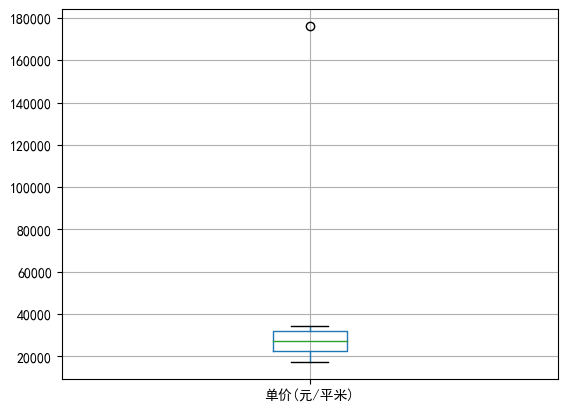

In [35]:
from matplotlib import pyplot as plt
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
estate = final_house[final_house['小区名称'].values == '翡翠城四期' ]
box = estate.boxplot(column='单价(元/平米)')
plt.show()

In [36]:
def box_outliers(ser):
    # 对需要检测的数据集进行排序
    new_ser = ser.sort_values()
    # 判断数据的总数量是奇数还是偶数
    if new_ser.count() % 2 == 0:
        # 分别计算Q3、Q1、IQR
        Q3 = new_ser[int(len(new_ser) / 2):].median()
        Q1 = new_ser[:int(len(new_ser) / 2)].median()
    elif new_ser.count() % 2 != 0:
        Q3 = new_ser[int((len(new_ser)-1) / 2):].median()
        Q1 = new_ser[:int((len(new_ser)-1) / 2)].median()
    IQR = round(Q3 - Q1, 1)
    rule = (round(Q3+1.5 * IQR, 1)<ser) | (round(Q1-1.5 * IQR, 1) > ser)
    index = np.arange(ser.shape[0])[rule]
    # 获取包含异常值的数据
    outliers = ser.iloc[index]
    return outliers

In [37]:
# 定义一个列表，用于保存异常值所在的索引
outliers_index_list = []
for i in set(final_house['小区名称']):
    estate = final_house[final_house['小区名称'].values == i]
    outliers_index = box_outliers(estate['单价(元/平米)'])
    if len(outliers_index) != 0:
        # 将异常值的索引添加到列表中
        outliers_index_list.append(outliers_index.index.tolist())
# 将utliers_index_list由嵌套列表转换为单个列表
outliers_index_single_li = sum(outliers_index_list, [])

In [38]:
final_house.loc[[i for i in outliers_index_single_li]]

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
0,锦江,翡翠城四期,翡翠城四期跃层 采光视野好 可看沙河 客厅带有阳台,高楼层(共29层)| 2009年建 |2室1厅 | 85.21平米 | 东南,331人关注/ 5月前发布,近地铁,176036.0
882,锦江,锦江城市花园二期,锦江城市花园二期，一楼套二，居家装修,低楼层(共34层) | 2010年建 | 2室1厅 | 51平米 | 东南,3人关注 / 4月前发布,NaN,21176.5
356,锦江,沙河壹号二期,锦江区 双公园 沙河壹号三房双卫房型 居家精装,中楼层(共32层) | 2013年建 | 3室2厅 | 91.1平米 | 东南,49人关注 / 4月前发布,NaN,23051.6
719,锦江,蜀都花园,中庭套三 不临街看小区大绿化 装修保养佳 看房方便,低楼层(共26层) | 2003年建 | 3室2厅 | 115.13平米 | 东北,20人关注 / 1年前发布,近地铁,19803.7
881,锦江,蜀都花园,全中庭套三 采光好 视野开阔 装修保养很不错,高楼层(共18层) | 2003年建 | 3室2厅 | 138.96平米 | 西北,6人关注 / 3月前发布,NaN,18710.4
343,锦江,蓝谷地三四期,蓝谷地三四期，标准套四精装修全面对小区中庭,中楼层(共13层) | 2008年建 | 4室2厅 | 183.48平米 | 东南,36人关注 / 1年前发布,NaN,21255.7
573,锦江,卓锦城三期,一楼带25平左右花园，套二带书房，户型方正，没有浪费,低楼层(共24层) | 2010年建 | 2室2厅 | 96.45平米 | 东南,67人关注 / 7月前发布,NaN,17107.3
519,锦江,东城攻略,二环内 中装套二 还带阳台,高楼层(共18层) | 2008年建 | 2室1厅 | 64.64平米 | 东南,134人关注 / 1年前发布,近地铁,12840.3
902,锦江,东城攻略,东城攻略 标准套二 高楼层,高楼层(共33层) | 2008年建 | 2室1厅 | 81.89平米 | 东南,9人关注 / 3月前发布,NaN,18683.6
923,锦江,东城攻略,房子满两年，保养的比较好，可以直接拎包入住,低楼层(共33层) | 2008年建 | 2室2厅 | 79.8平米 | 北,17人关注 / 1年前发布,NaN,18797.0


In [39]:
final_house.drop(0)

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
1,锦江,时代豪庭一期,时代豪庭套三 中间楼层 有装修 业主处理资产出售,中楼层(共38层)| 2009年建 |3室1厅 | 155.79平米| 东南,137人关注/ 5月前发布,NaN,26959.4
2,锦江,卓锦城六期,卓锦城六期紫郡房源，套三，进门带入户,中楼层(共31层)| 2014年建 |3室1厅 | 89.33平米| 西南,36人关注 / 23天前发布,NaN,22612.8
3,锦江,星城银座,春熙路太古里标准套一出售，现租给民宿。,高楼层(共11层) | 2003年建 | 1室0厅 | 51.07平米 | 南,29人关注 / 5月前发布,近地铁,18014.5
4,锦江,新莲新苑,新莲新苑优质套三，诚心出售，近沙河，采光视野好。,高楼层(共7层) | 2001年建 | 3室1厅 | 77.7平米 | 东南,14人关注 / 5月前发布,NaN,13513.5
5,锦江,俊发星雅俊园,星雅俊园优质平层公寓，业主精装修，套二带家具家电,低楼层(共37层) | 2015年建 | 2室1厅 | 59平米 | 西南,80人关注 / 4月前发布,NaN,13220.3
...,...,...,...,...,...,...,...
994,锦江,锦东庭园,锦东庭院居家套三 采光视野好,高楼层(共34层) | 2015年建 | 3室2厅 | 113平米 | 东南,23人关注 / 1年前发布,近地铁,25663.7
995,锦江,五世同堂街72号,五世同堂街72号 2室1厅 南,高楼层(共7层) | 1995年建 | 2室1厅 | 55.99平米 | 南,1人关注 / 9天前发布,近地铁,14288.3
996,锦江,城市博客VC时代,锦江区红星路在售套一 标准套一,高楼层(共33层) | 2009年建 | 1室1厅 | 46.69平米 | 东南,33人关注 / 1年前发布,近地铁,18205.2
997,锦江,大地城市脉搏,春熙路大地城市脉搏 办公装修 二套打通生活交通方便,中楼层(共20层) | 2004年建 | 2室1厅 | 75.73平米 | 东南,1人关注 / 6月前发布,近地铁,25089.1
